In [2]:
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Importing dataframes

In [3]:
from pathlib import Path
import os
data_folder = Path(os.getcwd())
final_csv_name = 'final_tracks.csv'
input_df = pd.read_csv(data_folder / final_csv_name)

In [4]:
playlists_csv_name = 'playlists.csv'
playlists_df = pd.read_csv(data_folder / playlists_csv_name)

#### Visualizing the audio features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F32767A3C8>,
      dtype=object)

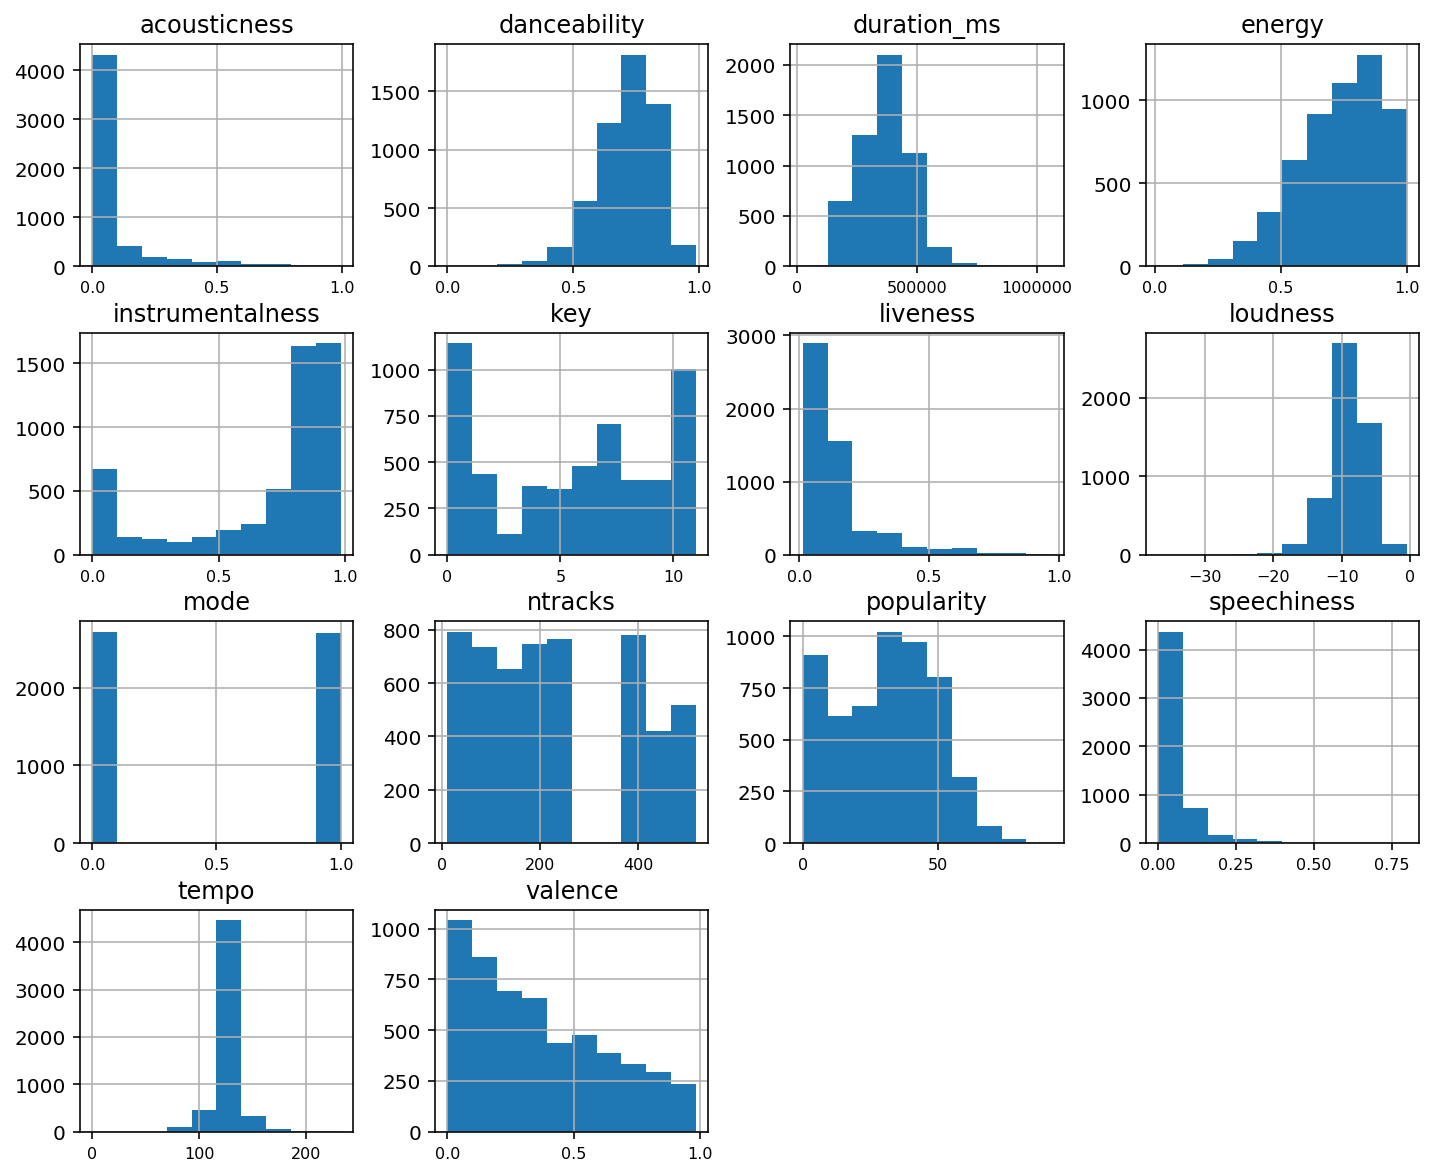

In [5]:
input_df.hist(xlabelsize=8, figsize=(12,10))

#### Desciptive statistics

In [28]:
input_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ntracks
count,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5.415000e+03,5415.000000
mean,30.604063,0.712675,0.736206,5.614958,-9.085469,0.498246,0.070287,0.081431,0.682836,0.153821,0.367275,125.019515,3.686365e+05,233.753647
std,18.234654,0.116121,0.165938,3.593857,2.886763,0.500043,0.059053,0.162190,0.309841,0.136277,0.267549,12.020908,1.066204e+05,156.281073
min,0.000000,0.000000,0.012800,0.000000,-36.856000,0.000000,0.000000,0.000001,0.000000,0.013500,0.000000,0.000000,2.442400e+04,12.000000
25%,16.000000,0.649000,0.623000,2.000000,-10.533000,0.000000,0.042350,0.001700,0.582000,0.084800,0.134500,121.019000,2.877615e+05,98.000000
50%,33.000000,0.731000,0.759000,6.000000,-8.789000,0.000000,0.052900,0.011100,0.838000,0.107000,0.313000,124.017000,3.753710e+05,188.000000
75%,44.000000,0.797000,0.869000,9.000000,-7.236000,1.000000,0.070900,0.071400,0.894000,0.150000,0.565000,128.007000,4.385045e+05,379.000000
max,92.000000,0.986000,0.999000,11.000000,-0.532000,1.000000,0.797000,0.994000,0.982000,0.972000,0.983000,232.124000,1.059733e+06,518.000000


Scaling dataframe

In [6]:
playlists_df

,playlist_id,playlist_name,ntracks,user_name,user_id
0,4vOoROBEHUtOlMdSSBjBVF,❤️,518,Rayane Nt,21cjyk2jsbgxug6o3o3pqumua
1,5IFBsuGk1bRPqmTlWV5NT6,Minimal Dub Techno,114,pokyah,pokyah
2,1X7S5aP99wjqlOOynxV6ik,IDM Ambient Electronica,75,Nik Davies,nikolaid82
3,5A11oPDlc0yP5h1qvCsAKR,IDM - Intelligent Dance Music aka Braindance,67,Sacred Ink,rsxt1c74c64g9356izo5x6bir
4,0FcartVl9q22B13K8S6MVj,Afro Jazz/Funk/House,43,tunguchimbo,tunguchimbo
5,2N2YAbGupKTGqnJTXnpRd8,Nu Disco / Disco House / Funk House,95,Arielle Roberge,arielle.roberge
6,6fKhnycm6NA0SzlbwXxfld,FUNK & house,402,Vincent de Halleux,11124510640
7,4ynzUD4CqF70F0VGA5TjiR,Descente,12,Imane Msd,21q4ch5scgjqomk2njitw5ntq
8,6MPjENBQWVGrLL32yfjTcW,Classic house is best house,26,Jasper Borgstede,11173976078
9,7gyX2WJ7xZVvGt7NkaErLG,classic house music 80's & 90's,180,djjohnblaze40,djjohnblaze40


User 1

In [16]:
user1 ='11156421146'
playlist1 = '747o5k5RNpTxvtrmYZSnRX'
playlist1_name = 'Old-school'

User 2

In [17]:
user2 ='1194015632'
playlist2 = '1mLWfRZ6iAgh5lbeqzsmhG'
playlist2_name = 'Hard Techno'

Playlist 1 dataframe

In [18]:
df1 = input_df[input_df['playlist_id']==playlist1]
df1

,playlist_id,track_id,track_name,artist_name,release_date,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_name,ntracks,user_name,user_id
1798,747o5k5RNpTxvtrmYZSnRX,67mtN6BlsJR0LVyzvNZnGt,Tonight's Da Night,Redman,1992-01-01,63,0.697,0.687,6,-11.111,...,0.260000,0.000048,0.4030,0.866,90.247,201373,Old-school,49,Omar OC,11156421146
1799,747o5k5RNpTxvtrmYZSnRX,2wxO3ZydJTZRi4Bbc02q7i,Smile,Scarface,2010-01-01,63,0.700,0.402,5,-9.930,...,0.049800,0.000001,0.1600,0.499,77.871,300600,Old-school,49,Omar OC,11156421146
1800,747o5k5RNpTxvtrmYZSnRX,7Kutf53V4k0CvU4nKu5oK6,Real Hip-Hop,Das EFX,1995-09-26,58,0.858,0.760,4,-7.895,...,0.021700,0.000000,0.3220,0.951,93.082,247613,Old-school,49,Omar OC,11156421146
1801,747o5k5RNpTxvtrmYZSnRX,6pvd8OBnYlV6FqskUOvWlx,Lifesaver,Guru,1995-07-18,51,0.718,0.488,1,-12.136,...,0.276000,0.000002,0.6670,0.669,92.059,253373,Old-school,49,Omar OC,11156421146
1802,747o5k5RNpTxvtrmYZSnRX,5oqSr3rehtGgZyDh0LCSA7,Gotta Get Mine,MC Breed,1993-01-01,59,0.855,0.520,7,-12.070,...,0.184000,0.000000,0.1140,0.402,92.451,264760,Old-school,49,Omar OC,11156421146
1803,747o5k5RNpTxvtrmYZSnRX,6aSpOtfzxFZ7hy0Bom7c1k,I Wanna Smoke,Gangsta Pat,1995-01-18,51,0.701,0.467,9,-13.573,...,0.344000,0.000000,0.0516,0.187,138.272,310560,Old-school,49,Omar OC,11156421146
1804,747o5k5RNpTxvtrmYZSnRX,7KUhj4QKRWmjrUFhc4l00Z,Jus Lyke Compton,DJ Quik,1991,30,0.770,0.812,7,-5.247,...,0.020500,0.000000,0.4610,0.652,94.661,251173,Old-school,49,Omar OC,11156421146
1805,747o5k5RNpTxvtrmYZSnRX,5LN1B9uVAVleCZ2euGarvi,MVP,Big L,1995-03-28,54,0.857,0.672,10,-5.934,...,0.064900,0.000000,0.3550,0.671,86.777,218867,Old-school,49,Omar OC,11156421146
1806,747o5k5RNpTxvtrmYZSnRX,4TGHOWSNAwUXn5onDQr0P1,Street Talkin',Slick Rick,1999-01-01,59,0.934,0.495,5,-7.483,...,0.054400,0.000000,0.0934,0.836,101.781,221200,Old-school,49,Omar OC,11156421146
1807,747o5k5RNpTxvtrmYZSnRX,63BokRfXSQhEU6Qi2dSJpZ,Mind Playing Tricks on Me,Geto Boys,1991-07-02,67,0.886,0.512,10,-11.825,...,0.207000,0.000000,0.0991,0.454,93.997,308733,Old-school,49,Omar OC,11156421146


Playlist 2 dataframe

In [19]:
df2 = input_df[input_df['playlist_id']==playlist2]
df2

,playlist_id,track_id,track_name,artist_name,release_date,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_name,ntracks,user_name,user_id
2570,1mLWfRZ6iAgh5lbeqzsmhG,2rw3jItDYMTM2lIcSrnIVp,Effondrement Intemporel,Kozlov,2019-11-01,4,0.536,0.986,0,-5.618,...,0.000062,0.937,0.4400,0.0953,145.996,361665,Hard Techno,25,Antoine Lin,1194015632
2571,1mLWfRZ6iAgh5lbeqzsmhG,7ynMPqoIUMRdebXtCmQTKc,Sparkling System,TRYM,2019-07-29,43,0.511,0.948,4,-8.614,...,0.001540,0.910,0.1210,0.0662,136.023,358793,Hard Techno,25,Antoine Lin,1194015632
2572,1mLWfRZ6iAgh5lbeqzsmhG,0N0qmV5OnKWZbVkaMDYi2s,Polar Aura,TRYM,2019-07-29,33,0.561,0.970,8,-7.268,...,0.021100,0.822,0.0631,0.2390,140.974,356833,Hard Techno,25,Antoine Lin,1194015632
2573,1mLWfRZ6iAgh5lbeqzsmhG,0lG0rrV2WcmxBDQn4Fm5PA,Millenium Pain,TRYM,2019-06-10,40,0.515,0.910,6,-7.877,...,0.001170,0.806,0.1180,0.0581,139.671,423385,Hard Techno,25,Antoine Lin,1194015632
2574,1mLWfRZ6iAgh5lbeqzsmhG,3qTrYRrHYOuUGbIDQr3d1y,Exarchia Squatter - Original Mix,TreuHand,2020-01-19,21,0.585,0.994,5,-6.582,...,0.000213,0.792,0.1210,0.5320,139.996,394286,Hard Techno,25,Antoine Lin,1194015632
2575,1mLWfRZ6iAgh5lbeqzsmhG,0fLXbPsjjg3RnR4h5BJmZU,Quand La Haine Ne Suffit Plus - Original Mix,Brulée,2020-01-19,8,0.563,0.951,8,-7.354,...,0.004840,0.912,0.0933,0.4660,136.016,388235,Hard Techno,25,Antoine Lin,1194015632
2576,1mLWfRZ6iAgh5lbeqzsmhG,0ChvWY0uRIGvXfhqvv8jC1,Atlantyda,VTSS,2019-12-13,39,0.509,0.984,11,-3.841,...,0.000015,0.935,0.0621,0.4910,140.009,396027,Hard Techno,25,Antoine Lin,1194015632
2577,1mLWfRZ6iAgh5lbeqzsmhG,1Ytytd2YDhlzSXnACP2d05,Talking 2 B Mad,SRVD,2019-06-21,31,0.714,0.642,2,-9.970,...,0.010700,0.882,0.0746,0.0332,132.995,549106,Hard Techno,25,Antoine Lin,1194015632
2578,1mLWfRZ6iAgh5lbeqzsmhG,7h54B074v0dLSAHKn5vjqU,Wake Up Call,Egotik,2020-03-18,0,0.489,0.799,2,-10.377,...,0.000964,0.841,0.1640,0.0494,139.969,356571,Hard Techno,25,Antoine Lin,1194015632
2579,1mLWfRZ6iAgh5lbeqzsmhG,39CO3gbmJzbBry8tdXqk66,Don't Start The Fire - Original mix,Rephate,2019-01-31,27,0.493,0.977,11,-8.391,...,0.000984,0.917,0.1060,0.5540,144.997,370758,Hard Techno,25,Antoine Lin,1194015632


In [20]:
input_df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,ntracks
count,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5.415000e+03,5415.000000
mean,30.604063,0.712675,0.736206,5.614958,-9.085469,0.498246,0.070287,0.081431,0.682836,0.153821,0.367275,125.019515,3.686365e+05,233.753647
std,18.234654,0.116121,0.165938,3.593857,2.886763,0.500043,0.059053,0.162190,0.309841,0.136277,0.267549,12.020908,1.066204e+05,156.281073
min,0.000000,0.000000,0.012800,0.000000,-36.856000,0.000000,0.000000,0.000001,0.000000,0.013500,0.000000,0.000000,2.442400e+04,12.000000
25%,16.000000,0.649000,0.623000,2.000000,-10.533000,0.000000,0.042350,0.001700,0.582000,0.084800,0.134500,121.019000,2.877615e+05,98.000000
50%,33.000000,0.731000,0.759000,6.000000,-8.789000,0.000000,0.052900,0.011100,0.838000,0.107000,0.313000,124.017000,3.753710e+05,188.000000
75%,44.000000,0.797000,0.869000,9.000000,-7.236000,1.000000,0.070900,0.071400,0.894000,0.150000,0.565000,128.007000,4.385045e+05,379.000000
max,92.000000,0.986000,0.999000,11.000000,-0.532000,1.000000,0.797000,0.994000,0.982000,0.972000,0.983000,232.124000,1.059733e+06,518.000000


Keep only tracks and audio features (Content for our recommender system)

In [21]:
df1 = df1.drop(['playlist_id','playlist_name','track_name','user_name','user_id','ntracks'], axis=1)
df2 = df2.drop(['playlist_id','playlist_name','track_name','user_name','user_id','ntracks'], axis=1)


Plotting playlist features


In [22]:
grouped_df = input_df.groupby('playlist_id').mean()

Converting release_date to datetime

Selecting two playlists to compare attributes

In [23]:
radar_df = grouped_df[['popularity', 'energy', 'loudness', 'tempo', 'speechiness', 'valence', 'danceability']]

Scaling the dataframe 

In [24]:
x = radar_df.values
i = radar_df.index
c = radar_df.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_radar_df = pd.DataFrame(x_scaled, index=i, columns=c)
scaled_radar_df.head()

,popularity,energy,loudness,tempo,speechiness,valence,danceability
playlist_id,,,,,,,
07xUOyXVx9v5upH7E9TW6o,0.574750,0.600710,0.761432,0.547152,0.116340,0.667572,0.946208
0FcartVl9q22B13K8S6MVj,0.675631,0.478153,0.640489,0.520341,0.170633,1.000000,0.802847
0GjxLo6j50BBb0hFV34iPY,0.491487,0.444203,0.584203,0.587657,0.031408,0.079991,0.694455
0GrjRNkSdtcyhf8g1ihgbV,0.771633,0.262642,0.633760,0.512779,0.071923,0.266781,0.695304
0OabBwiajrrdGKantVsJVD,0.671317,0.329424,0.584556,0.582989,0.083165,0.219295,0.683228


Setting up the radar chart

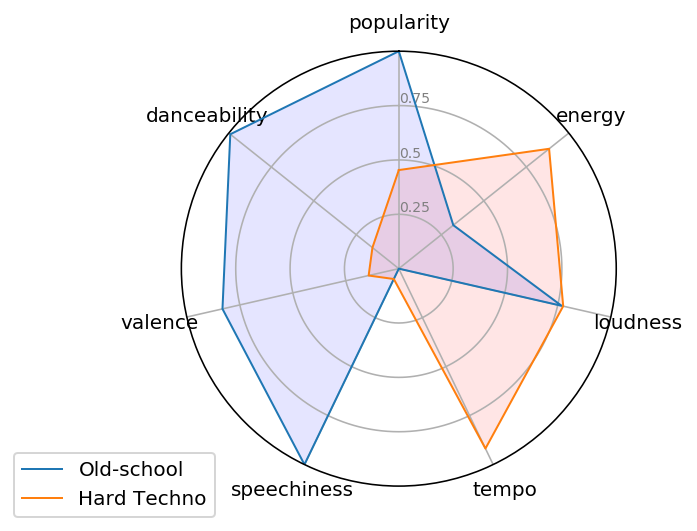

In [25]:
#number of features
features=list(scaled_radar_df)
n = len(features)
#angles
angles = [i / float(n) * 2 * pi for i in range(n)]
angles += angles[:1]
# setting up plot
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], features)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
plt.ylim(0,1)

# playlist1
values=scaled_radar_df.loc[playlist1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=playlist1_name)
ax.fill(angles, values, 'b', alpha=0.1)

# playlist2
values=scaled_radar_df.loc[playlist2].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=playlist2_name)
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


Boxplot for playlist 'ether'

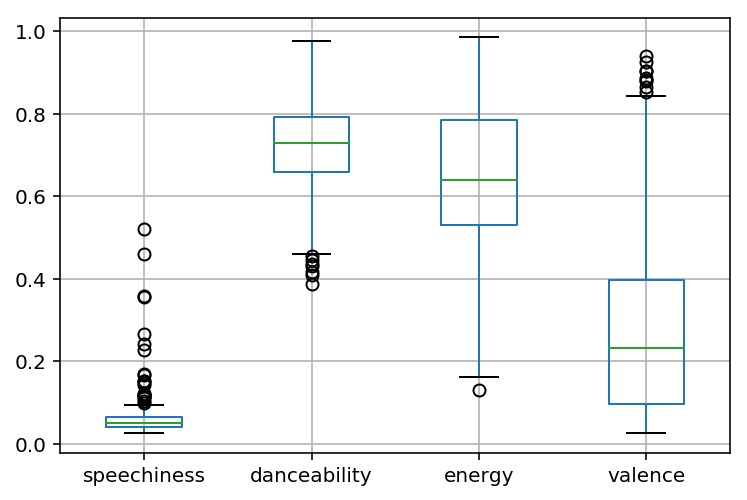

In [26]:
boxplot = input_df[input_df['playlist_id'] == '0OabBwiajrrdGKantVsJVD'].boxplot(column=['speechiness', 'danceability', 'energy', 'valence'])

Boxplot for playlist 'Old School'

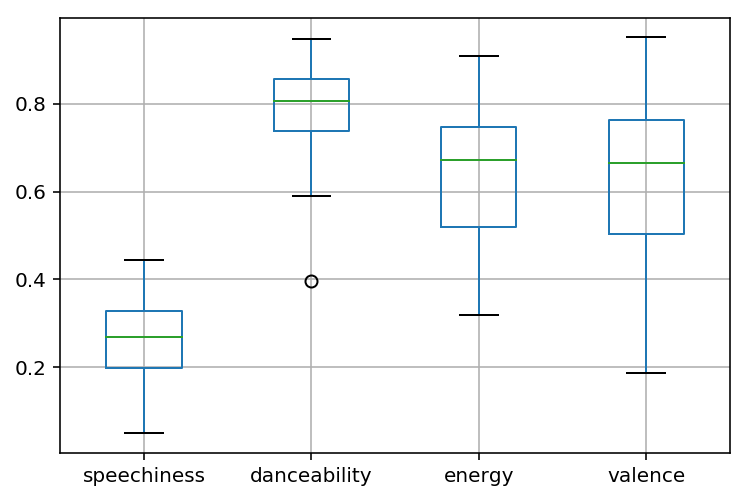

In [27]:
boxplot = input_df[input_df['playlist_id'] == '747o5k5RNpTxvtrmYZSnRX'].boxplot(column=['speechiness', 'danceability', 'energy', 'valence'])